# NN/Numerical Regressor: Vehicle Mileage Prediction

In [ ]:
import pandas as pd
import sklearn

Pandas is most likeley used when missing data / fixing data

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df["MPG"].mean()

23.514572864321607

In [ ]:
df = df.dropna()

In [ ]:
# columns = ["Cylinders", "Model Year", "Origin"]
df = df.astype(float)

Split data into 3 parts
- Train
- Validation
- Test

We are here merging the validation and test due to lack to data entries

In [ ]:
from  sklearn.model_selection import train_test_split
import numpy as np

X = df.drop('MPG', axis=1) # Capital because that is a matrix -> Input Matrix
y = df['MPG'] # Lowercase since the data is an array -> Output Array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# 0.2 -> Split ration between train and test

X_train.shape, X_test.shape, y_train.shape, y_test.shape
type(y_train)


pandas.core.series.Series

In [ ]:
from tensorflow.keras.layers import Dense, SimpleRNN
import tensorflow as tf

In [ ]:
my_model = tf.keras.Sequential([
    # Input((1, 8))
    Dense(100, activation="relu"),
    # 100 * (8+1)
    Dense(10, activation="relu"),
    SimpleRNN(units=1, activation='tanh', name='Hidden-Recurrent-Layer'))
    # 10*(100+1)
    Dense(10, activation="relu"),
    # 10*(10+1)
    Dense(1)
    # 1*(10+1)
])

my_model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
# accuraccy -> If data is matching
# MSE, MSLE, MAE -> Difference btw prediction and expected
model_history = my_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
10/10 [==============================] - 9s 45ms/step - loss: 17373.5020 - mae: 121.5429 - val_loss: 1365.5695 - val_mae: 35.7540
Epoch 2/10
10/10 [==============================] - 0s 13ms/step - loss: 698.9968 - mae: 24.9100 - val_loss: 587.5173 - val_mae: 23.0756
Epoch 3/10
10/10 [==============================] - 0s 23ms/step - loss: 377.1506 - mae: 16.9788 - val_loss: 125.7078 - val_mae: 9.3703
Epoch 4/10
10/10 [==============================] - 0s 17ms/step - loss: 180.9805 - mae: 11.3088 - val_loss: 140.1292 - val_mae: 9.8517
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 151.1945 - mae: 10.1285 - val_loss: 139.6962 - val_mae: 9.6343
Epoch 6/10
10/10 [==============================] - 0s 15ms/step - loss: 149.4257 - mae: 9.9768 - val_loss: 124.9488 - val_mae: 9.3445
Epoch 7/10
10/10 [==============================] - 0s 15ms/step - loss: 142.7760 - mae: 9.9751 - val_loss: 122.1221 - val_mae: 9.2163
Epoch 8/10
10/10 [==========================

`val_mae` 8.7 meaning the error is close to 8.7 miles per gallon when taking into consideration so many cars, this translates to model being very close to accurate

<Axes: >

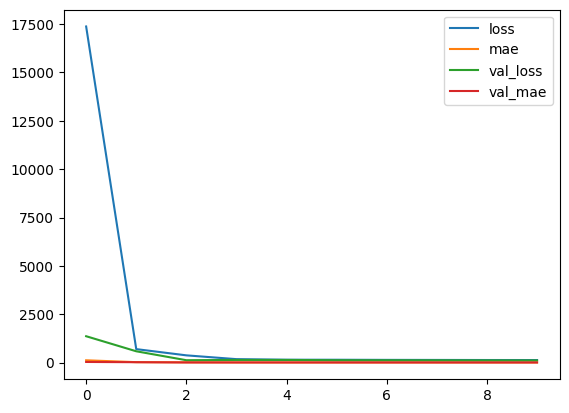

In [ ]:
pd.DataFrame(model_history.history).plot()